# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [alvin ferdiansyah brilliant]
- **Email:** [m006d4ky1949@bangkit.academy]
- **ID Dicoding:** [alvin_ferdiansyah]

## Menentukan Pertanyaan Bisnis

- 1. Apakah ada pola khusus pada jam-jam puncak (misalnya, jam berapa terjadi peminjaman sepeda terbanyak)?
- 2. Bagaimana pengaruh kelembapan dan kecepatan angin terhadap peminjaman sepeda pada jam-jam tertentu?
- 3. Apakah terdapat korelasi antara kondisi cuaca ekstrem dengan penurunan dalam peminjaman sepeda ?
- 4. Bagaimana prediksi permintaan peminjaman sepeda pada jam-jam tertentu ?
- 5. Bagaimana dampak liburan pada pola peminjaman sepeda pada jam-jam tertentu,
dan apakah terdapat perubahan signifikan pada perilaku peminjaman pada hari libur?

### **Penyelesaian dan pembuatan kode untuk menjawab soal**

Install Library

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install streamlit
!pip install matplotlib
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Memasuki folder dataset pada drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

bin@                        datalab/  kaggle/  libx32@                   opt/   sbin@  tools/
boot/                       dev/      lib@     media/                    proc/  srv/   usr/
content/                    etc/      lib32@   mnt/                      root/  sys/   var/
cuda-keyring_1.0-1_all.deb  home/     lib64@   NGC-DL-CONTAINER-LICENSE  run/   tmp/


In [ ]:
cd /content/drive

/content/drive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd MyDrive/

/content/drive/MyDrive


In [ ]:
ls

 51f9aa02-d959-417d-9c65-1a8f4251203e.jpg   bangkit22.jpg   Classroom/          Dataset/
 b00d36f5-53b7-4873-910c-38c587d52acb.jpg   Bangkit.jpg    'Colab Notebooks'/   maret1.jpg


In [ ]:
cd Dataset/

/content/drive/MyDrive/Dataset


In [ ]:
ls

day.csv  hour.csv  Readme.txt


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Fungsi Menjawab Pertanyaan No 1

Pada fungsi tersebut awalnya akan melakukan perhitungan jumlah sepeda tiap jamnya setelah ditemukan jumlah sepeda yang terbanyak tiapnyamya maka akan disimpan pada jam berapa terjadi dan berapa jumlah peminjamnanya. visualisasi pada plot akan memperlihatkan jumlah dari peminjaman sepeda tiap jamnya

In [39]:
def Every_hour(df):
  hour_counting = df.groupby("hr")["cnt"].sum()
  max_hour = hour_counting.idxmax()
  max_count = hour_counting.max()
  plt.figure(figsize=(13, 8))
  plt.plot(hour_counting.index, hour_counting, marker="o", linestyle="-", color="b")
  plt.title("Counting Every Hours")
  plt.xlabel("Hour")
  plt.ylabel("Count")
  plt.xticks(range(24))
  for i, txt in enumerate(hour_counting):
      if txt==max_count:
          continue
      plt.annotate(txt, (hour_counting.index[i], txt), textcoords="offset points", xytext=(0,5), ha="center", fontsize=8)
  plt.annotate(f"Time: {max_hour}\nCount: {max_count}",
           xy=(max_hour, max_count), textcoords="offset points", xytext=(0,10),
           arrowprops=dict(facecolor="red", arrowstyle="->"), ha="center", fontsize=10, color="red")
  plt.show()

### Fungsi Menjawab Pertanyaan No 2

Fungsi ini akan menjawab pertanyaan no 2. Perbedaan fungsi ini dibandingkan fungsi lainnya adalah pada bagian plotnya yakni menggunakan grafik 3D. Grafik 3D dipilih karena menggunakan 3 fitur untuk pembandingnya yakni humidity, air speed dan jumlah peminjaman. dengan menggunakan 3d plot akan lebih mudah dalam melakukan analisisnya.

In [41]:
def Humidity_airspeed(df):
  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_subplot(111, projection="3d")
  sizes = 50 * data["windspeed"]
  scatter = ax.scatter(df["hum"], df["windspeed"], df["cnt"], c=df["hr"], cmap="viridis", s=sizes, alpha=0.7)
  ax.set_title("Humidity and air speed every hours", fontsize=16)
  ax.set_xlabel("Humidity", fontsize=14)
  ax.set_ylabel("Air Speed", fontsize=14)
  ax.set_zlabel("Counting", fontsize=14)
  cbar = plt.colorbar(scatter, ax=ax, pad=0.05)
  cbar.set_label("Time", rotation=270, labelpad=15, fontsize=12)
  plt.show()

### Fungsi Menjawab Pertanyaan No 3

Mada fungsi ini akan melihat hubungan antara kondisi musim dengan peminjaman sepeda dalam jam-jam tertentu. Penggambaran plot disini menggunakan violinplot, violinplot dipilih dengan tujuan pada gambar tersebut terlihat jels pada masing masing musim berapa jumlah sepeda yang dipinjam serta dapat melihat persebaran datanya

In [42]:
def Weathers_analysis(df):
  df_analysis = pd.DataFrame(df)
  sns.set(style="whitegrid", palette="Set2")
  fig, ax = plt.subplots(figsize=(12, 8))
  sns.violinplot(x="weathersit", y="cnt", data=df_analysis, ax=ax, palette="Set2", inner="quartile")
  mean_points = df_analysis.groupby("weathersit")["cnt"].mean().values
  ax.scatter(x=np.arange(len(mean_points)), y=mean_points, color="red", s=100, marker="o", label="Mean")
  ax.set_title("Analysis Bicyle in Weathers", fontsize=16)
  ax.set_xlabel("Weathers", fontsize=14)
  ax.set_ylabel("Bicyle Count", fontsize=14)
  ax.legend(title="Weathers Mean", loc="upper right")
  plt.show()

### Fungsi Menjawab Pertanyaan No 4

Pertanyaan no 4 menjadi pertanyaan yang berbeda dibandingkan pertanyaan lainnya. Pertanyaan ini lebih berfokus pada pola prediksi atau kedepannya. Pada fungsi no 4, data dipecah menjadi data taining dan data testing. Penggunaan liniear regression dipilih karena lebih efektif berdasarkan data yang ada karena adata yang ada memiliki pola yang kurang lebih mirip. data dipecah menjadi 8:2, data train sebanyak 80 persen dan data testing sebanyak 20 persen. visualisasi data akan menghasilkan data yang menunjukan jumlah peminjaman seperti grafik no 1 tetapi ada pola regresinya.

In [66]:
def Hours_prediction(df):
  X = df[["hr"]]
  y = df["cnt"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  poly = PolynomialFeatures(degree=9)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)
  model = LinearRegression()
  model.fit(X_train_poly, y_train)
  y_pred = model.predict(X_test_poly)
  mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error: {mse}")
  plt.scatter(X_test, y_test, color="black", label="Actual Data")
  X_test_sorted, y_pred_sorted = zip(*sorted(zip(X_test.values, y_pred)))
  plt.xticks(range(24))
  plt.plot(X_test_sorted, y_pred_sorted, color="blue", linewidth=3, label=f"Polynomial Regression")
  plt.title(f"Predicted Bike Demand based on hours using Polynomial Regression")
  plt.xlabel("Hour")
  plt.ylabel("Count")
  plt.legend()
  plt.show()

### Fungsi Menjawab Pertanyaan No 5

Fungsi ini akan memberikan perbandingan antara jumlah peminjaman sepeda ketika hari libur dan hari biasa. pebandingan dibuat perjam dengan histogram perjam. perbandingan akan menunjukan jumlah perjam ketika libur dan hari biasa

In [44]:
def Holiday_analysis(df):
  holiday_data = df[df["holiday"] == 1]
  non_holiday_data = df[df["holiday"] == 0]
  plt.figure(figsize=(12, 6))
  sns.histplot(holiday_data["hr"], bins=24, kde=True, label="Holiday", color="blue")
  sns.histplot(non_holiday_data["hr"], bins=24, kde=True, label="Weekday", color="orange")
  plt.title(f"Distribution Holiday and Weekend")
  plt.xticks(range(24))
  plt.xlabel("Hour")
  plt.ylabel("Count")
  plt.legend()
  plt.show()
  t_stat, p_value = stats.ttest_ind(holiday_data["cnt"], non_holiday_data["cnt"])
  mean_holiday = np.mean(holiday_data["cnt"])
  mean_non_holiday = np.mean(non_holiday_data["cnt"])
  std_holiday = np.std(holiday_data["cnt"])
  std_non_holiday = np.std(non_holiday_data["cnt"])
  print(f"T-statistic: {t_stat}\nP-value: {p_value}")
  print(f"Mean Holiday: {mean_holiday}, Std Holiday: {std_holiday}")
  print(f"Mean Weekday: {mean_non_holiday}, Std Weekday: {std_non_holiday}")

### Pengumpulan data menggunakan dataset yang telah disediakan yakni hour.csv

In [36]:
data = pd.read_csv("hour.csv")
print(data)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

### Pemanggilan fungsi untuk menjawab pertanyaan No 1

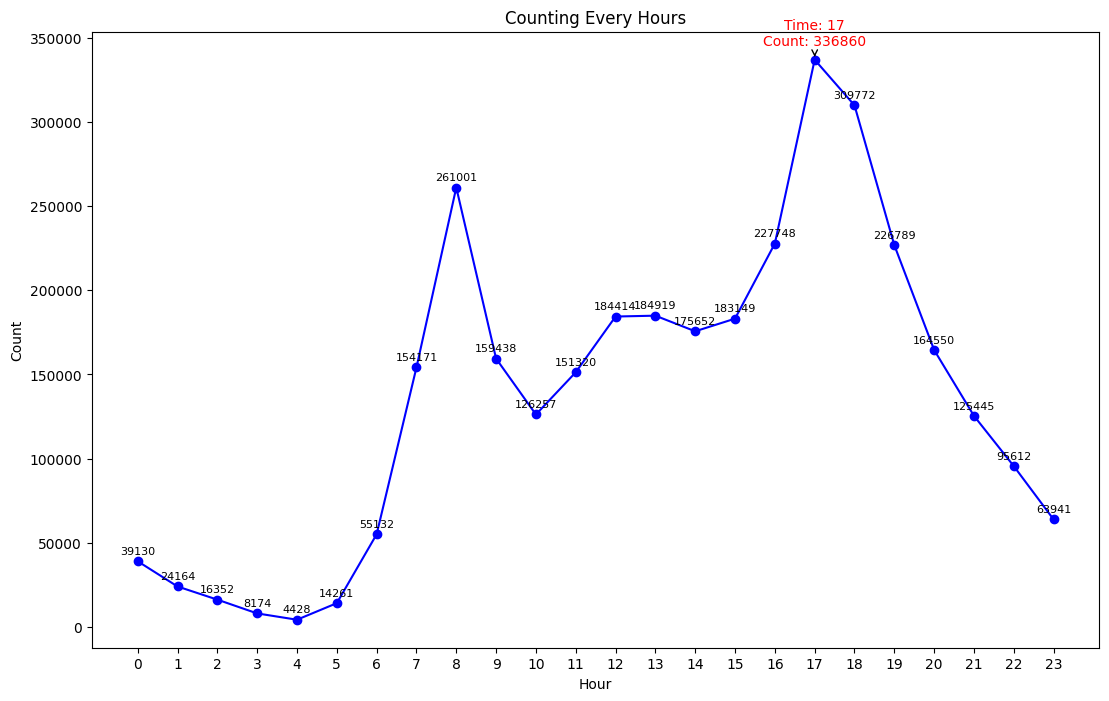

In [40]:
Every_hour(data)

### Pemanggilan Fungsi Untuk Menjawab Pertanyaan No 2

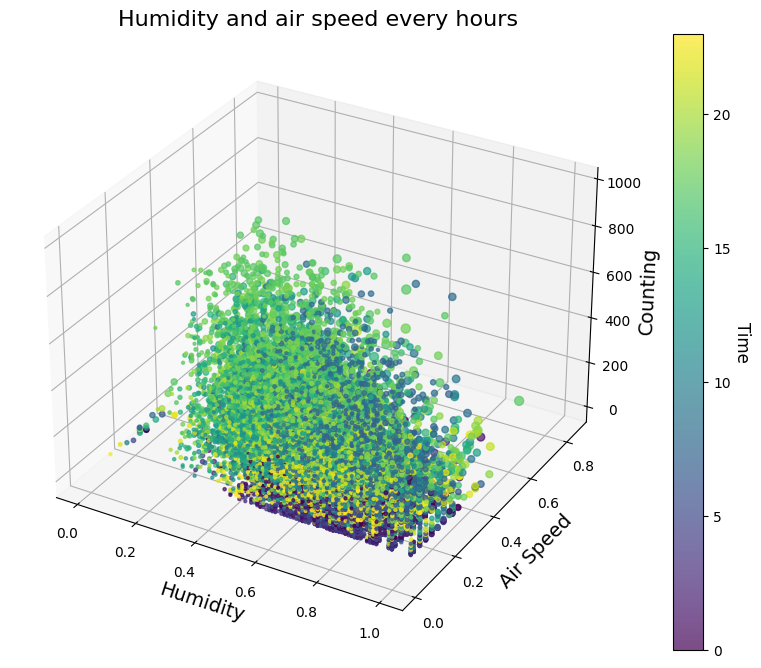

In [45]:
Humidity_airspeed(data)

## Pemanggilan Fungsi Untuk Menjawab Pertanyaan No 3

<ipython-input-42-12904e1a198c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="weathersit", y="cnt", data=df_analysis, ax=ax, palette="Set2", inner="quartile")


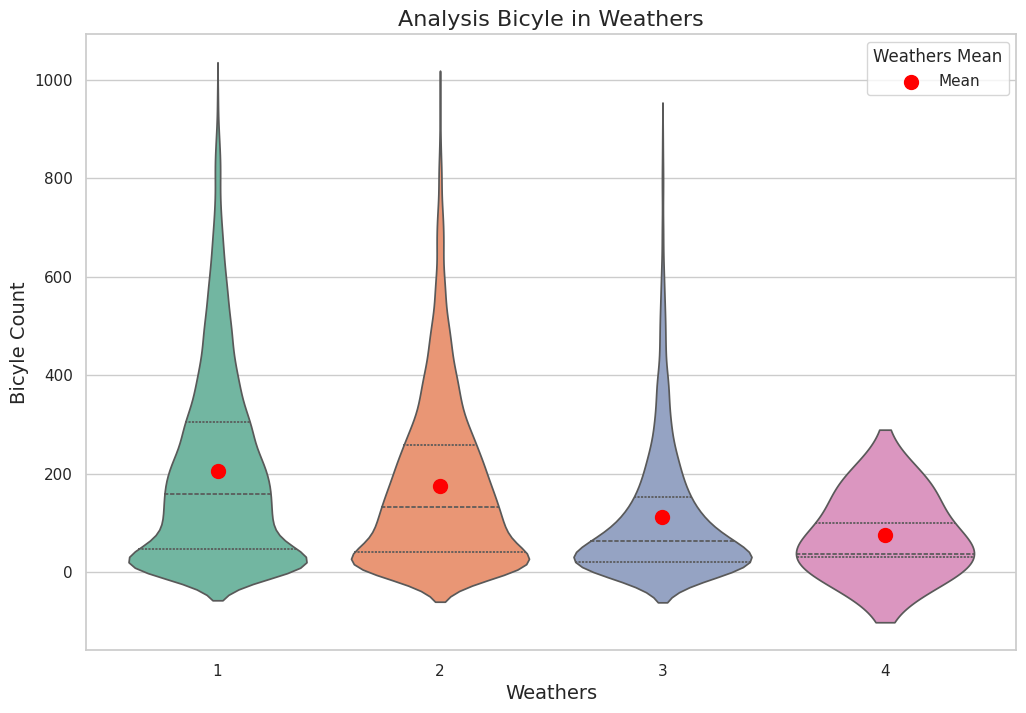

In [46]:
Weathers_analysis(data)

### Pemanggilan Fungsi Untuk Menjawab Pertanyaan No 4

Mean Squared Error: 17302.727848846524


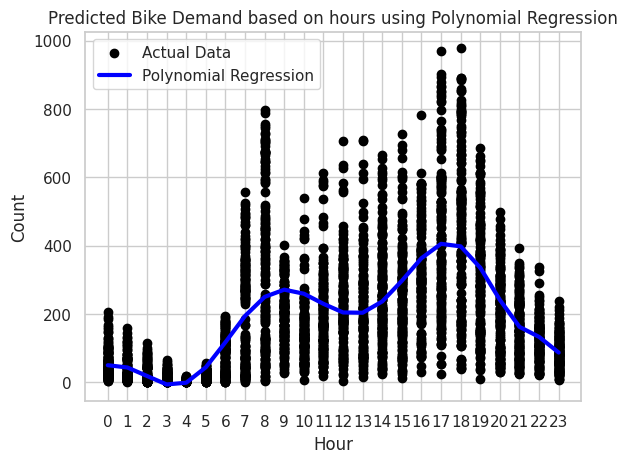

In [67]:
Hours_prediction(data)

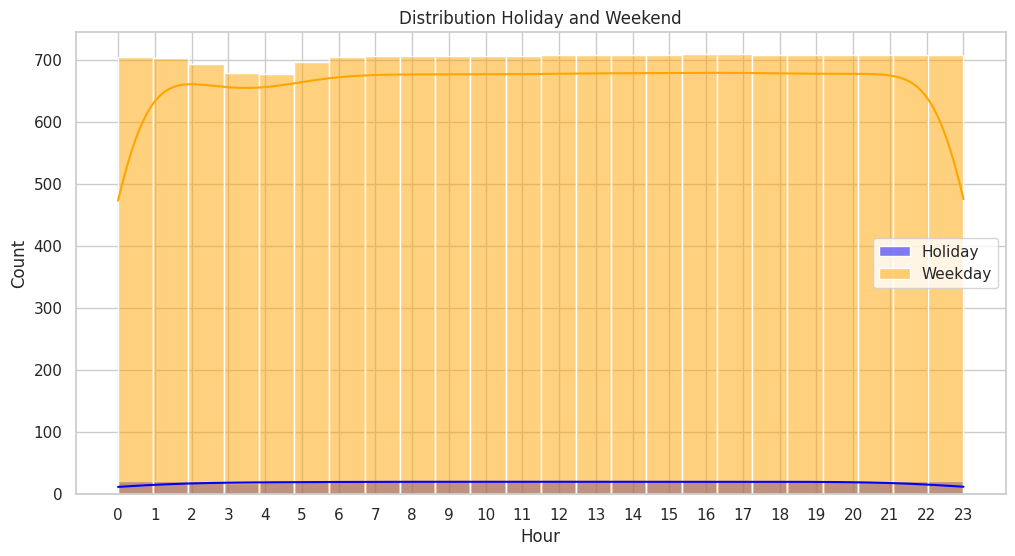

T-statistic: -4.07884548432246
P-value: 4.5461689487652855e-05
Mean Holiday: 156.87, Std Holiday: 156.6006420804206
Mean Weekday: 190.4285798921737, Std Weekday: 181.9760440938131


In [68]:
Holiday_analysis(data)

## Conclusion

- Jam yang paling banyak peminjaman sepeda adalah jam 17 dengan jumlah 336860 kemudian peminjaman sepeda paling jarang adalah jam 4 yakni hanya sekitar 4428. Berdasarkan grafik dapat disimpulkan pula jika orang kurang meminati peminjaman jam kurang dari jam 6
- Kelembaban udara dan kecepatan udara emepengaruhi jumlah peminjaman sepeda dimana semakin lembab udara maka semakin jarang pula peminjam sepeda yang berbanding lurus dengan kecepatan udara.
- musim mempengaruhi peminjaman sepeda dimana sepeda sering dipinjam pada musim 1 dan 2 sedangkan pada musim 3 sepeda cukup ada peminjaman sedangkan musin 4 sangat jarang yang meminjam sepeda. rata rata oeminjaman sepeda paling tinggi berada pada musim 1.
- Berdasarkan grafik regresi linier diatas dapat dilihat prediksi peminjaman spseda tiap jamnya dimana sepeda akan mengalami kenaikan setelah pukul 4 dan penurunan pada pukul10 dan mengalami puncaknya pada pukul 17 dan kemudian mengalami penurunan kembali.
- Perbandingan jumlah peminat sepeda pda holiday dan weekday dapat dilihat dari grafik dimana weekday jauh lebih banyak orang yang melakukan peminjaman daripada holiday rata rata dari holiday sendiri kurang lebih 156 dan weekday 190, sedangkan standard deviasi dari holiday 156 dan weekday 181. holiday memiliki standard deviasi yang lebih kecil dimana data tidak terlalu tersebar dibandingkan dengan weekday